In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
print(f'Total data for traing: {x_train.shape[0]}, Train X shape: {x_train.shape}, Train y shape: {y_train.shape}')
print(f'Total data for test: {x_test.shape[0]}, Test X shape: {x_test.shape}, Test y shape: {y_test.shape}')

Total data for traing: 50000, Train X shape: (50000, 32, 32, 3), Train y shape: (50000, 1)
Total data for test: 10000, Test X shape: (10000, 32, 32, 3), Test y shape: (10000, 1)


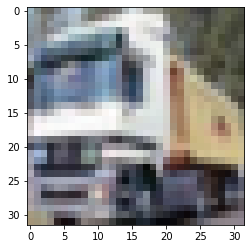

This image shows the class: [9]


In [4]:
i = 1
plt.imshow(x_train[i], cmap='Greys')
plt.show()
print(f'This image shows the class: {y_train[i]}')

In [5]:
x_train = (np.reshape(x_train, (-1, 32*32*3)) / 255.0)
x_test = (np.reshape(x_test, (-1, 32*32*3)) / 255.0)

In [6]:
print(f'Total data for traing: {x_train.shape[0]}, Train X shape: {x_train.shape}')
print(f'Total data for test: {x_test.shape[0]}, Test X shape: {x_test.shape}')

Total data for traing: 50000, Train X shape: (50000, 3072)
Total data for test: 10000, Test X shape: (10000, 3072)


In [7]:
from tensorflow.keras.utils import to_categorical
print(y_train[0 : 3], '\n')

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

print(y_train[0 : 3, :])

[[6]
 [9]
 [9]] 

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


model

In [8]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense

inp_layer = Input(shape = (32*32*3,))
hidden_layer = Dense(units = 100, activation = 'relu')(inp_layer)
out_layer = Dense(units = 10, activation = 'softmax')(hidden_layer)

model = Model(inputs = inp_layer, outputs = out_layer)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3072)]            0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________


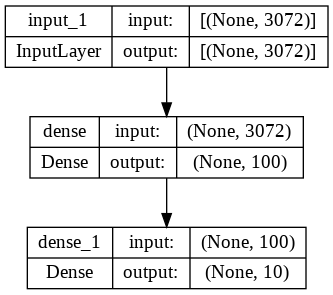

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
results = model.fit(x_train, y_train, batch_size=4, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
12500/12500 [==============================] - 45s 3ms/step - loss: 2.1181 - accuracy: 0.1684 - val_loss: 2.0722 - val_accuracy: 0.1813
Epoch 2/10
12500/12500 [==============================] - 42s 3ms/step - loss: 2.0594 - accuracy: 0.1841 - val_loss: 2.0400 - val_accuracy: 0.1801
Epoch 3/10
12500/12500 [==============================] - 43s 3ms/step - loss: 2.0518 - accuracy: 0.1837 - val_loss: 2.0597 - val_accuracy: 0.1830
Epoch 4/10
12500/12500 [==============================] - 42s 3ms/step - loss: 2.0477 - accuracy: 0.1870 - val_loss: 2.0367 - val_accuracy: 0.1819
Epoch 5/10
12500/12500 [==============================] - 46s 4ms/step - loss: 2.0460 - accuracy: 0.1873 - val_loss: 2.0336 - val_accuracy: 0.1912
Epoch 6/10
12500/12500 [==============================] - 48s 4ms/step - loss: 2.0451 - accuracy: 0.1853 - val_loss: 2.0367 - val_accuracy: 0.1898
Epoch 7/10
12500/12500 [==============================] - 55s 4ms/step - loss: 2.0431 - accuracy: 0.1847 - val_loss: 2

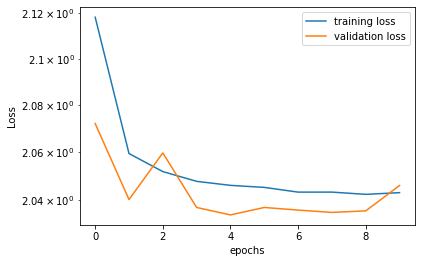

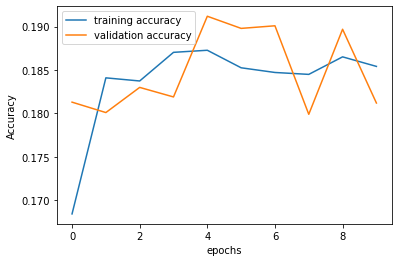

In [19]:
train_loss = results.history['loss']
val_loss = results.history['val_loss']

plt.semilogy(train_loss)
plt.semilogy(val_loss)

plt.legend(['training loss', 'validation loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

accuracy = results.history['accuracy']
val_accuracy = results.history['val_accuracy']

plt.plot(accuracy)
plt.plot(val_accuracy)

plt.legend(['training accuracy', 'validation accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.show()

In [12]:
y_hat = np.argmax(model.predict(x_test), axis=1)
test_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 2ms/step


In [13]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      0.24      0.14      1000
           3       0.00      0.00      0.00      1000
           4       0.11      0.10      0.10      1000
           5       0.00      0.00      0.00      1000
           6       0.21      0.72      0.32      1000
           7       0.00      0.00      0.00      1000
           8       0.25      0.66      0.36      1000
           9       0.17      0.10      0.12      1000

    accuracy                           0.18     10000
   macro avg       0.08      0.18      0.10     10000
weighted avg       0.08      0.18      0.10     10000



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


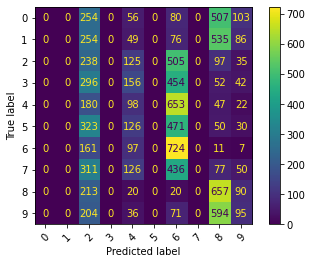

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# print(confusion_matrix(test_labels, y_hat))
cm = confusion_matrix(test_labels, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(xticks_rotation=45)